In [21]:

pre_trained_log_file_path = '../results/Baseline-WebCaricature-resnet18-5-5-Jan-09-2024-22-04-28/log_files/Baseline-resnet18-train-Jan-09-2024-22-04-28.log'
log_file_path = '../results/Baseline-WebCaricature-resnet18-5-5-Jan-08-2024-17-02-40/log_files/Baseline-resnet18-train-Jan-08-2024-17-02-40.log'
# Read the first 50 lines of the file to understand its structure
lines_to_read = 50

with open(pre_trained_log_file_path, 'r') as file:
    first_lines = [next(file) for _ in range(lines_to_read)]

first_lines

["2024-01-09 22:04:30,268 [INFO] core.trainer: {'data_root': './WebCaricature', 'image_size': 84, 'use_memory': False, 'augment': True, 'augment_times': 1, 'augment_times_query': 1, 'workers': 8, 'dataloader_num': 1, 'device_ids': 0, 'n_gpu': 1, 'seed': 2147483647, 'deterministic': True, 'port': 34542, 'log_name': None, 'log_level': 'info', 'log_interval': 100, 'log_paramerter': False, 'result_root': './results', 'save_interval': 10, 'save_part': ['emb_func'], 'tag': None, 'epoch': 50, 'test_epoch': 5, 'parallel_part': ['emb_func'], 'pretrain_path': './pth/Baseline-20240106T180818Z-001/Baseline/Baseline-miniImageNet--ravi-resnet18-5-Reproduce/checkpoints/model_best.pth', 'resume': False, 'way_num': 5, 'shot_num': 5, 'query_num': 11, 'test_way': 5, 'test_shot': 5, 'test_query': 11, 'episode_size': 1, 'train_episode': 100, 'test_episode': 100, 'batch_size': 128, 'val_per_epoch': 1, 'optimizer': {'name': 'Adam', 'kwargs': {'lr': 0.01}, 'other': None}, 'lr_scheduler': {'name': 'StepLR', 'k

In [22]:
import re

# Initialize lists to hold accuracy values for training, validation, and testing
train_acc, val_acc, test_acc = [], [], []
train_acc1, val_acc1, test_acc1 = [], [], []

# Regular expression pattern to match accuracy values
pattern = re.compile(r'\* Acc@1 ([0-9]+\.?[0-9]*)')

# Open and read the log file
with open(pre_trained_log_file_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Categorize the accuracy values based on the type of set mentioned in the line
            if 'Train' in line or 'train' in line:
                train_acc.append(float(match.group(1)))
            elif 'Validation' in line or 'val' in line:
                val_acc.append(float(match.group(1)))
            elif 'Testing' in line or 'test' in line:
                test_acc.append(float(match.group(1)))


# Open and read the log file
with open(log_file_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Categorize the accuracy values based on the type of set mentioned in the line
            if 'Train' in line or 'train' in line:
                train_acc1.append(float(match.group(1)))
            elif 'Validation' in line or 'val' in line:
                val_acc1.append(float(match.group(1)))
            elif 'Testing' in line or 'test' in line:
                test_acc1.append(float(match.group(1)))


In [23]:
# Splitting the train_acc list into three separate lists for training, validation, and testing accuracies

# Initialize lists to hold the split accuracy values for training, validation, and testing
split_train_acc, split_val_acc, split_test_acc = [], [], []
split_train_acc1, split_val_acc1, split_test_acc1 = [], [], []

# Assuming the accuracies are in a repeated sequence of training, validation, and testing
for i in range(0, len(train_acc), 3):
    # Append training accuracy
    if i < len(train_acc):
        split_train_acc.append(train_acc[i])
    # Append validation accuracy
    if i + 1 < len(train_acc):
        split_val_acc.append(train_acc[i + 1])
    # Append testing accuracy
    if i + 2 < len(train_acc):
        split_test_acc.append(train_acc[i + 2])

(split_train_acc, split_val_acc, split_test_acc)
train_acc = split_train_acc
val_acc = split_val_acc
test_acc = split_test_acc

for i in range(0, len(train_acc1), 3):
    # Append training accuracy
    if i < len(train_acc1):
        split_train_acc1.append(train_acc1[i])
    # Append validation accuracy
    if i + 1 < len(train_acc1):
        split_val_acc1.append(train_acc1[i + 1])
    # Append testing accuracy
    if i + 2 < len(train_acc1):
        split_test_acc1.append(train_acc1[i + 2])

(split_train_acc1, split_val_acc1, split_test_acc1)
train_acc1 = split_train_acc1
val_acc1 = split_val_acc1
test_acc1 = split_test_acc1


In [24]:
import matplotlib.pyplot as plt

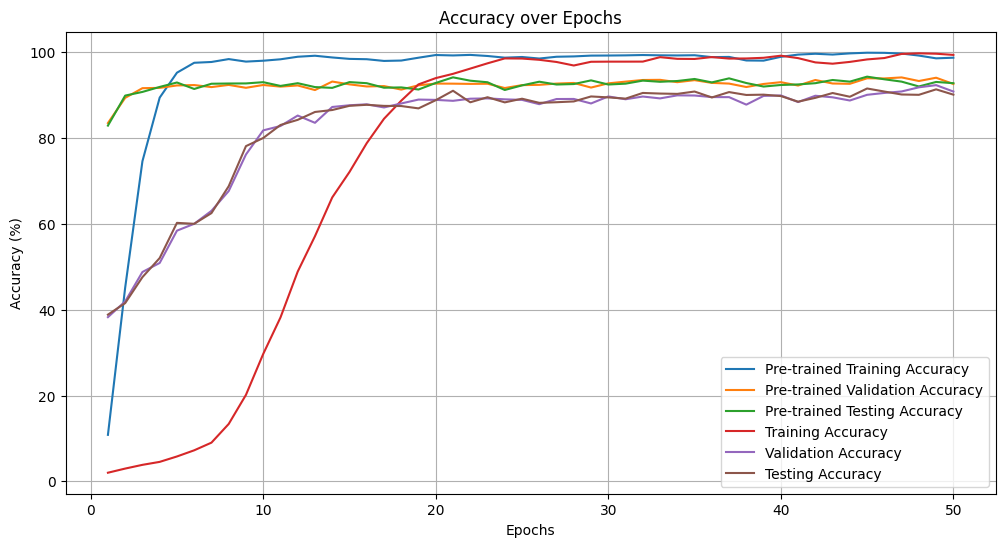

In [25]:
epochs = list(range(1, 51))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, label='Pre-trained Training Accuracy')
plt.plot(epochs, val_acc, label='Pre-trained Validation Accuracy')
plt.plot(epochs, test_acc, label='Pre-trained Testing Accuracy')
plt.plot(epochs, train_acc1, label='Training Accuracy')
plt.plot(epochs, val_acc1, label='Validation Accuracy')
plt.plot(epochs, test_acc1, label='Testing Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

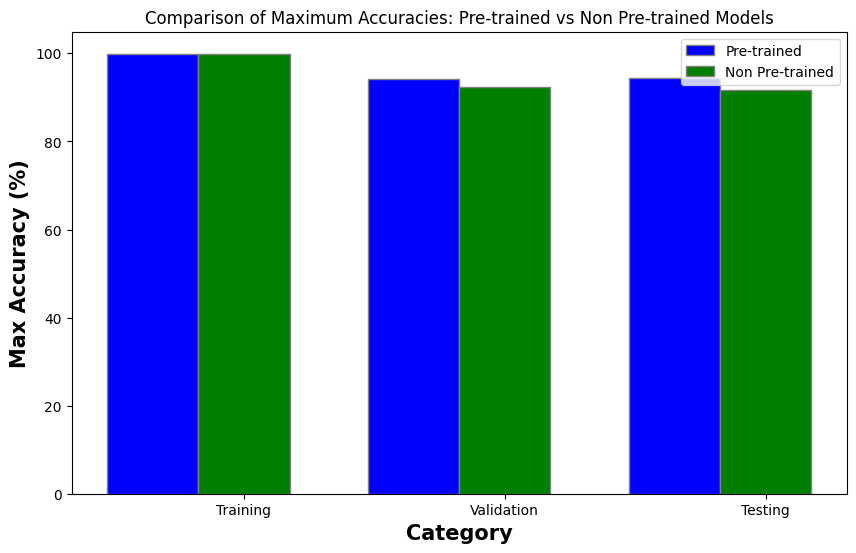

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the maximum accuracies
max_train_acc_pretrained = max(train_acc)
max_val_acc_pretrained = max(val_acc)
max_test_acc_pretrained = max(test_acc)

max_train_acc = max(train_acc1)
max_val_acc = max(val_acc1)
max_test_acc = max(test_acc1)

# Categories
categories = ['Training', 'Validation', 'Testing']

# Values for pre-trained and non pre-trained models
pretrained_values = [max_train_acc_pretrained, max_val_acc_pretrained, max_test_acc_pretrained]
non_pretrained_values = [max_train_acc, max_val_acc, max_test_acc]

bar_width = 0.35  # width of the bars

# Set position of bar on X axis
r1 = np.arange(len(pretrained_values))
r2 = [x + bar_width for x in r1]

# Making the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, pretrained_values, color='b', width=bar_width, edgecolor='grey', label='Pre-trained')
plt.bar(r2, non_pretrained_values, color='g', width=bar_width, edgecolor='grey', label='Non Pre-trained')

# Adding labels
plt.xlabel('Category', fontweight='bold', fontsize=15)
plt.ylabel('Max Accuracy (%)', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(pretrained_values))], categories)

# Create legend & Show graphic
plt.title('Comparison of Maximum Accuracies: Pre-trained vs Non Pre-trained Models')
plt.legend()
plt.show()


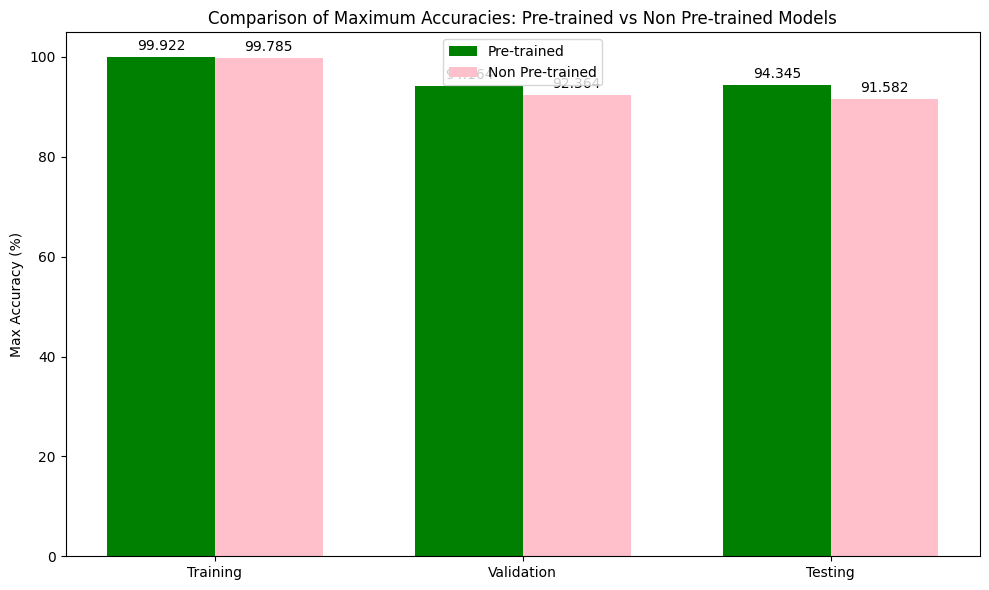

In [30]:
# There seems to be a recurring issue with the plotting environment.
# I will attempt to create the histogram once more, with appropriate spacing and labeling.

import matplotlib.pyplot as plt
import numpy as np

# Data for histogram
categories = ['Training', 'Validation', 'Testing']
pre_trained_max_acc = [max(train_acc), max(val_acc), max(test_acc)]
non_pre_trained_max_acc = [max(train_acc1), max(val_acc1), max(test_acc1)]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pre_trained_max_acc, width, label='Pre-trained', color='green')
rects2 = ax.bar(x + width/2, non_pre_trained_max_acc, width, label='Non Pre-trained', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Max Accuracy (%)')
ax.set_title('Comparison of Maximum Accuracies: Pre-trained vs Non Pre-trained Models')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function to label the bars
autolabel(rects1)
autolabel(rects2)

# Adjust the subplots to provide more space between the bars and the labels
fig.tight_layout()

plt.show()


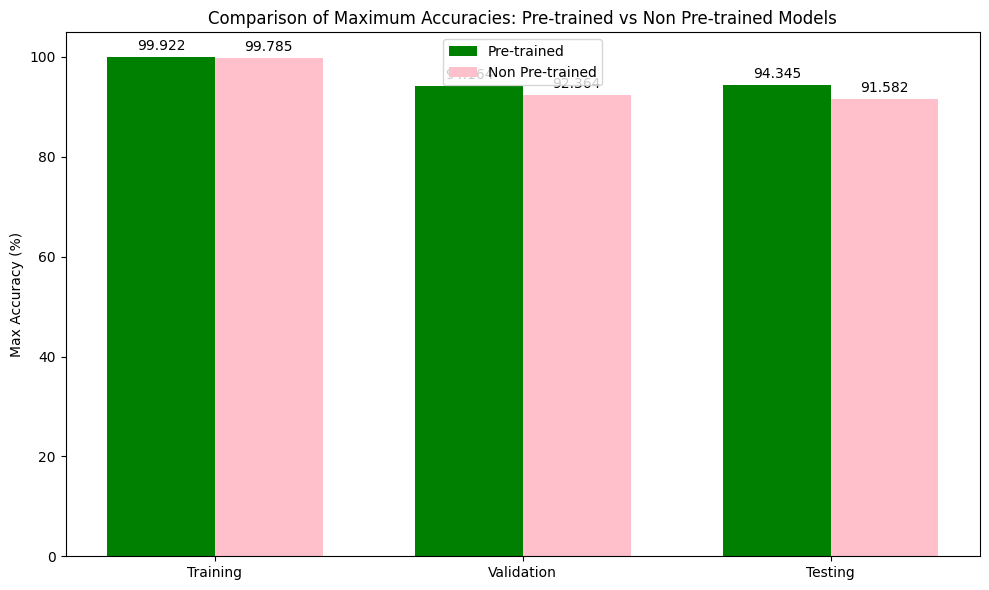

In [32]:
# There seems to be a recurring issue with the plotting environment.
# I will attempt to create the histogram once more, with appropriate spacing and labeling.

import matplotlib.pyplot as plt
import numpy as np

# Data for histogram
categories = ['Training', 'Validation', 'Testing']
pre_trained_max_acc = [max(train_acc), max(val_acc), max(test_acc)]
non_pre_trained_max_acc = [max(train_acc1), max(val_acc1), max(test_acc1)]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pre_trained_max_acc, width, label='Pre-trained', color='green')
rects2 = ax.bar(x + width/2, non_pre_trained_max_acc, width, label='Non Pre-trained', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Max Accuracy (%)')
ax.set_title('Comparison of Maximum Accuracies: Pre-trained vs Non Pre-trained Models')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function to label the bars
autolabel(rects1)
autolabel(rects2)

# Adjust the subplots to provide more space between the bars and the labels
fig.tight_layout()

plt.show()

def autolabel(rects, other_rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, other_rect in zip(rects, other_rects):
        height = rect.get_height()
        other_height = other_rect.get_height()
        
        # Adjust the vertical offset based on the comparison of bar heights
        offset = 3 if height <= other_height else -15
        
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, offset),  # adjust vertical offset here
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function with both sets of bars
autolabel(rects1, rects2)
autolabel(rects2, rects1)


# Adjust the subplots to provide more space between the bars and the labels
fig.tight_layout()

plt.show()

